In [28]:
#%%
from datetime import datetime
from importlib import reload

import vnpy.app.portfolio_strategy
reload(vnpy.app.portfolio_strategy)

from vnpy.app.portfolio_strategy import BacktestingEngine
from vnpy.trader.constant import Interval

import vnpy.app.portfolio_strategy.strategies.pair_trading_strategy as stg
reload(stg)
from vnpy.app.portfolio_strategy.strategies.pair_trading_strategy import PairTradingStrategy


In [29]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbols=["y888.DCE", "p888.DCE"],
    interval=Interval.MINUTE,
    start=datetime(2019, 1, 1),
    end=datetime(2020, 4, 30),
    rates={
        "y888.DCE": 0/10000,
        "p888.DCE": 0/10000
    },
    slippages={
        "y888.DCE": 0,
        "p888.DCE": 0
    },
    sizes={
        "y888.DCE": 10,
        "p888.DCE": 10
    },
    priceticks={
        "y888.DCE": 1,
        "p888.DCE": 1
    },
    capital=1_000_000,
)

setting = {
    "boll_window": 20,
    "boll_dev": 1,
}
engine.add_strategy(PairTradingStrategy, setting)

2020-05-14 22:43:33.533760	开始加载历史数据
2020-05-14 22:43:33.543498	y888.DCE加载进度： [6%]
2020-05-14 22:43:33.552295	y888.DCE加载进度：# [12%]
2020-05-14 22:43:33.563048	y888.DCE加载进度：# [19%]
2020-05-14 22:43:33.575737	y888.DCE加载进度：## [25%]
2020-05-14 22:43:33.583561	y888.DCE加载进度：### [31%]
2020-05-14 22:43:33.596245	y888.DCE加载进度：### [37%]
2020-05-14 22:43:33.609915	y888.DCE加载进度：#### [43%]
2020-05-14 22:43:33.620690	y888.DCE加载进度：#### [49%]
2020-05-14 22:43:33.633346	y888.DCE加载进度：##### [56%]
2020-05-14 22:43:33.642142	y888.DCE加载进度：###### [62%]
2020-05-14 22:43:33.652902	y888.DCE加载进度：###### [68%]
2020-05-14 22:43:33.668505	y888.DCE加载进度：####### [74%]
2020-05-14 22:43:33.683148	y888.DCE加载进度：######## [80%]
2020-05-14 22:43:33.690953	y888.DCE加载进度：######## [87%]
2020-05-14 22:43:33.698781	y888.DCE加载进度：######### [93%]
2020-05-14 22:43:33.706577	y888.DCE加载进度：######### [99%]
2020-05-14 22:43:33.708538	y888.DCE加载进度：########## [100%]
2020-05-14 22:43:33.708538	y888.DCE历史数据加载完成，数据量：104370
2020-05-14 22:43:33.7202

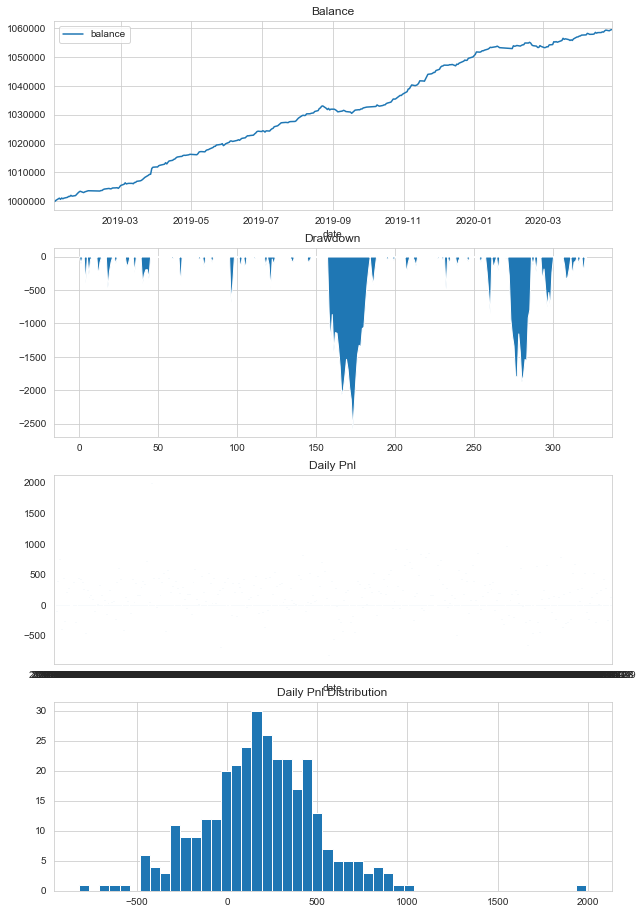

In [30]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()